# Collaboration and Competition

---

This notebook runs John's solution for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.  It uses the Unity ML-Agents environment to train two cooperative agents to play a tennis-like game.

**Need more description here - refer to readme?**






...


This code depends upon a custom Unity environment provided by the Udacity staff that embodies the variation on tennis.  It will open a separate Unity window for visualizing the environment as the agents train or play.


## Define how we will use this notebook - JOHN FIX THIS!!!!

In the next cell, set the appropriate values of a couple control variables:
- **EXPLORE** determines whether the notebook does exploratory training or inference demonstration.
    - **True** runs a hyperparameter exploration loop to generate many training runs with a random search algorithm.  To use this well, you should study that cell and specify the ranges of hyperparameters to be explored.
    - **False** runs a few inference episodes of a pretrained model and opens a visualization window to watch it play.
- **config_name:** the name of a model configuration & run to be loaded from a checkpoint to begin the exercise.  
    - If EXPLORE = True, this is optional, and tells the training loop to start from this pre-trained model and continue refining it; if the value is _None_ then the training starts from a randomly initialized model.
    - If EXPLORE = False, then this must reflect the name of a legitimate config/run (e.g. "M37.01").
- **checkpoint_episode:** if a checkpoint is being used to start the exercise, then this number reflects what episode that checkpoint was captured from.  The checkpoint_name and checkpoint_episode together are required to completely identify the checkpoint file.


In [1]:
EXPLORE            = True
config_name        = "M37" # Must be None if not using!
run_number         = 29
checkpoint_episode = 2000

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from train import train
from maddpg import Maddpg

%matplotlib inline

initial_episode = checkpoint_episode
checkpoint_path = "checkpoint/{}/".format(config_name)
tag = "{}.{:02d}".format(config_name, run_number)

if EXPLORE:
    turn_off_graphics = True
    initial_episode = 0
    unity_train_mode = True
    if config_name != None:
        initial_episode = checkpoint_episode
else:
    turn_off_graphics = False
    unity_train_mode = False

# create a new Unity environment
# it needs to be done once, outside any loop, as closing an environment then restarting causes
# a Unity exception about the handle no longer being active.
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64", seed=0, 
                       no_graphics=turn_off_graphics)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]                       
env_info = env.reset(train_mode=unity_train_mode)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Train the agents

The next cells will invoke the training program to create the agents.  All of the real code is in Python flat files in this project directory.

In [3]:
import numpy as np

class RandomSampler():
    
    def __init__(self, vars):
        """Accepts definition of the set of variables to be sampled.
            
            Params:
                vars (list of lists): each item is a list containing:
                                        item 0 - either 'discrete', 'continuous-int' or 'continuous-float'
                                        items 1-N depend on the value of item 0:
                                        if discrete, then these are the set of values to be chosen from
                                        if continuous then these are the min & max bounds of the range
        """
        
        self.vars = vars
        
        self.rng = np.random.default_rng()
    
    
    def sample(self):
        """Draws a random sample of all variables at its disposal.
        
            Returns a list of values in the order of definition.
        """

        rtn = []
        for v in self.vars:
            if v[0] == "discrete":
                choice = self.rng.integers(low=1, high=len(v), size=1)[0]
                rtn.append(v[choice])
                
            elif v[0] == "continuous-int":
                choice = self.rng.integers(low=v[1], high=v[2], size=1)[0]
                rtn.append(choice)
                
            elif v[0] == "continuous-float":
                choice = self.rng.random() * (v[2]-v[1]) + v[1]
                rtn.append(choice)
            
            else:
                print("///// RandomSampler error:  unknown type ", v[0])
            
        return rtn
                
vars = [["discrete", 88, 66, 11, 22, 33, 44, 99, 101, 77],
        ["discrete", 500], #1-item list
        ["continuous-int", 43, 44], #1-item range
        ["continuous-int", 0, 10],
        ["continuous-float", 0.0, 1.0],
        ["continuous-float", -3.3, 0.0],
        ["continuous-float", -1.0, 6.4],
       ]
rs = RandomSampler(vars)

for i in range(3):
    out = rs.sample()
    print("\n", i, "\n", out)



 0 
 [88, 500, 43, 3, 0.5162385507240368, -2.6069590767063113, 3.4575789642692722]

 1 
 [88, 500, 43, 5, 0.8846228814019477, -2.847711178858539, 1.5168751903248503]

 2 
 [11, 500, 43, 6, 0.7748071353117455, -1.8626800804254537, 0.7810317891587937]


Ready to train M41 over 30 training sets for 15001 episodes each, with fixed params:
    Max episodes   =  15001
    Weight decay   =  0.0
    Gamma          =  0.99
    LR anneal freq =  1000
    LR anneal mult =  0.8
    Buf prime size =  10000

///// Beginning training set  M41.00  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999969
      Noise scale      = 0.045
      LR actor         = 0.0000118
      LR critic        = 0.0000935
      Learning every      77  time steps
      Learn iterations =  1
      Tau              = 0.00231
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer.................................................................................................

2000	Average score:   0.000,        mem:  10002/     0 ( 0.0%), avg 3493.0 eps/min;  0.1 hr rem   
3760	Running a

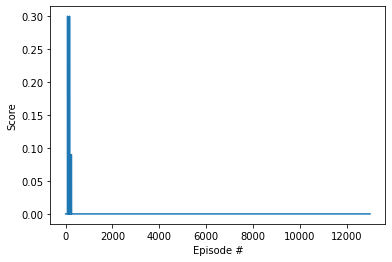

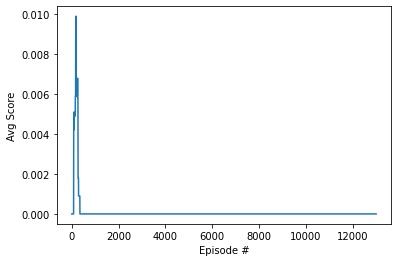


///// Beginning training set  M41.01  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999994
      Noise scale      = 0.045
      LR actor         = 0.0001026
      LR critic        = 0.0000832
      Learning every      79  time steps
      Learn iterations =  1
      Tau              = 0.00193
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer...................................................................................................

2000	Average score:   0.090,        mem:  10004/     1 ( 0.0%), avg 2156.1 eps/min;  0.1 hr rem   
4000	Average score:   0.043,        mem:  13078/    97 ( 0.7%), avg 1234.8 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  16373/   274 ( 1.7%), avg 1212.7 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:  19291/   274 ( 1.4%

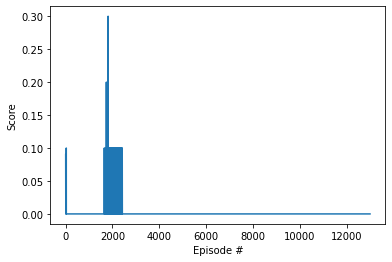

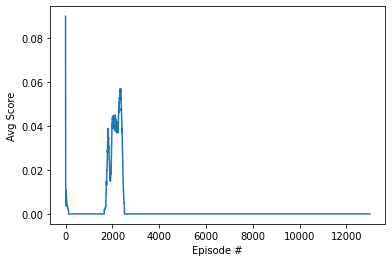


///// Beginning training set  M41.02  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999987
      Noise scale      = 0.042
      LR actor         = 0.0001169
      LR critic        = 0.0001261
      Learning every      83  time steps
      Learn iterations =  1
      Tau              = 0.00280
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer..................................................................................................

2000	Average score:   0.000,        mem:  10002/     0 ( 0.0%), avg 3824.0 eps/min;  0.1 hr rem   
4000	Average score:   0.030,        mem:  12899/    35 ( 0.3%), avg 1288.2 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15801/    92 ( 0.6%), avg 1233.4 eps/min;  0.1 hr rem   
6360	Running avg/max: 0.000/0.000,  mem:  16338/    92 ( 0.6%)

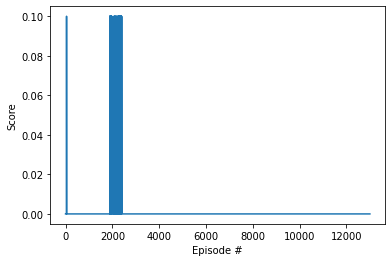

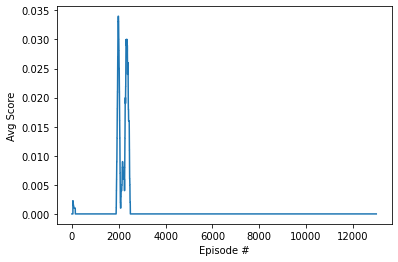


///// Beginning training set  M41.03  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999964
      Noise scale      = 0.049
      LR actor         = 0.0000654
      LR critic        = 0.0001211
      Learning every      97  time steps
      Learn iterations =  1
      Tau              = 0.00249
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer..................................................................................................

2000	Average score:   0.000,        mem:  10003/     0 ( 0.0%), avg 3483.4 eps/min;  0.1 hr rem   
3559	Running avg/max: 0.001/0.100,  mem:  12242/     7 ( 0.1%), avg 1375.1 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  12863/     7 ( 0.1%), avg 1386.9 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15657/     7 (

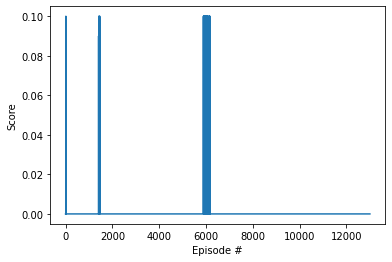

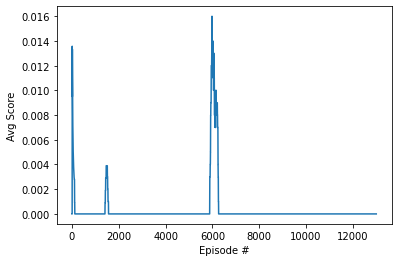


///// Beginning training set  M41.04  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999984
      Noise scale      = 0.040
      LR actor         = 0.0000245
      LR critic        = 0.0000515
      Learning every      87  time steps
      Learn iterations =  1
      Tau              = 0.00268
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer................................................................................................

2000	Average score:   0.000,        mem:  10003/     1 ( 0.0%), avg 1844.1 eps/min;  0.1 hr rem   
4000	Average score:   0.000,        mem:  12838/    15 ( 0.1%), avg 1103.5 eps/min;  0.2 hr rem   
5583	Running avg/max: 0.000/0.000,  mem:  15132/    37 ( 0.2%), avg 1098.9 eps/min   
* noise mult = 0.2
6000	Average score:   0.002,        mem:  15793/    45 ( 0

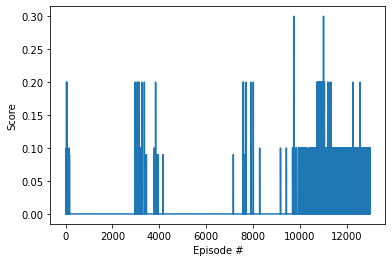

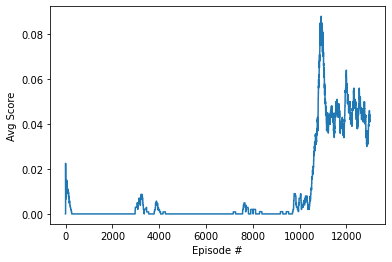


///// Beginning training set  M41.05  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999952
      Noise scale      = 0.045
      LR actor         = 0.0000869
      LR critic        = 0.0001445
      Learning every      81  time steps
      Learn iterations =  1
      Tau              = 0.00191
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer.................................................................................................

2000	Average score:   0.100,        mem:  10005/     1 ( 0.0%), avg 876.3 eps/min;  0.3 hr rem   
3169	Running avg/max: 0.000/0.000,  mem:  11635/     7 ( 0.1%), avg 1108.8 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  12800/     7 ( 0.1%), avg 1114.6 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15610/     7 ( 0

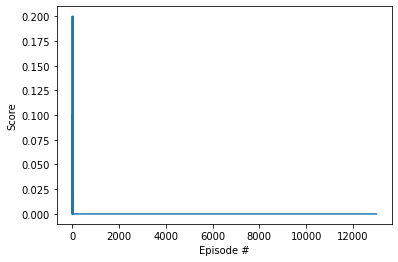

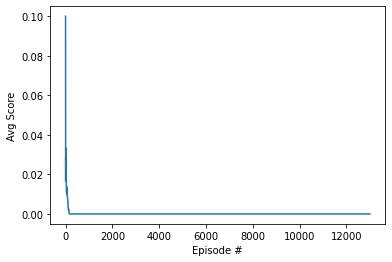


///// Beginning training set  M41.06  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999951
      Noise scale      = 0.045
      LR actor         = 0.0001634
      LR critic        = 0.0001224
      Learning every      93  time steps
      Learn iterations =  1
      Tau              = 0.00219
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer................................................................................................

2000	Average score:   0.000,        mem:  10001/     0 ( 0.0%), avg 10940.2 eps/min;  0.0 hr rem   
3161	Running avg/max: 0.000/0.000,  mem:  11637/     1 ( 0.0%), avg 1141.2 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  12794/     1 ( 0.0%), avg 1133.4 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15592/     1 ( 

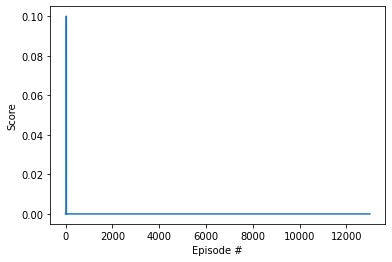

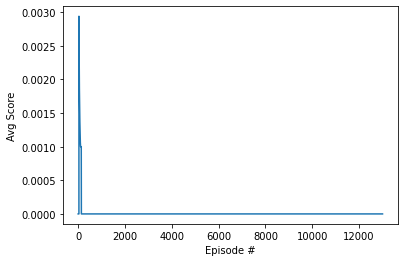


///// Beginning training set  M41.07  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999981
      Noise scale      = 0.040
      LR actor         = 0.0001534
      LR critic        = 0.0001463
      Learning every      91  time steps
      Learn iterations =  1
      Tau              = 0.00259
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer.................................................................................................

2000	Average score:   0.000,        mem:  10002/     0 ( 0.0%), avg 1698.8 eps/min;  0.1 hr rem   
4000	Average score:   0.000,        mem:  12801/     2 ( 0.0%), avg 1130.5 eps/min;  0.2 hr rem   
4951	Running avg/max: 0.000/0.000,  mem:  14136/     2 ( 0.0%), avg 1132.9 eps/min   
* noise mult = 0.2
6000	Average score:   0.000,        mem:  15614/     2 ( 

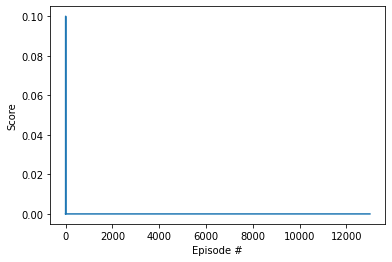

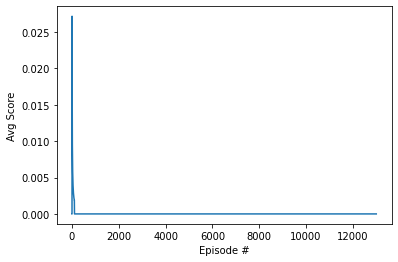


///// Beginning training set  M41.08  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999986
      Noise scale      = 0.044
      LR actor         = 0.0001714
      LR critic        = 0.0000299
      Learning every      80  time steps
      Learn iterations =  1
      Tau              = 0.00205
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer.................................................................................................

2000	Average score:   0.000,        mem:  10001/     0 ( 0.0%), avg 2006.3 eps/min;  0.1 hr rem   
4000	Average score:   0.000,        mem:  12789/     4 ( 0.0%), avg 1062.2 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15609/     4 ( 0.0%), avg 1011.0 eps/min;  0.2 hr rem   
6161	Running avg/max: 0.000/0.000,  mem:  15828/     4 ( 0.0%),

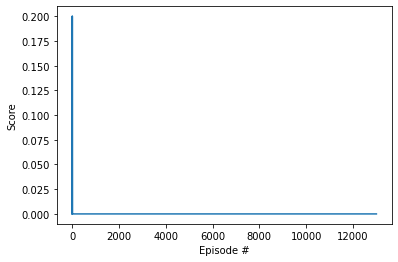

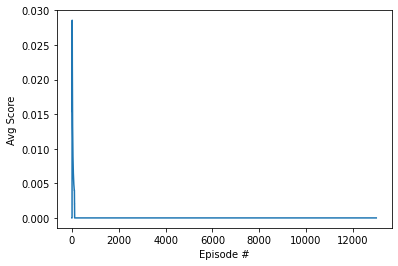


///// Beginning training set  M41.09  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999992
      Noise scale      = 0.046
      LR actor         = 0.0000310
      LR critic        = 0.0001546
      Learning every      100  time steps
      Learn iterations =  1
      Tau              = 0.00205
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer...................................................................................................

2000	Average score:   0.000,        mem:  10002/     0 ( 0.0%), avg 1373.9 eps/min;  0.2 hr rem   
4000	Average score:   0.003,        mem:  12907/    21 ( 0.2%), avg 1110.6 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15865/    63 ( 0.4%), avg 1114.4 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:  18798/    63 ( 0.3

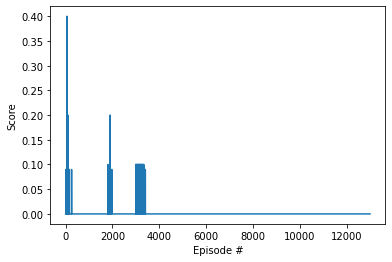

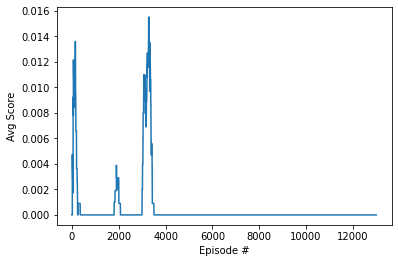


///// Beginning training set  M41.10  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999965
      Noise scale      = 0.041
      LR actor         = 0.0001961
      LR critic        = 0.0000983
      Learning every      95  time steps
      Learn iterations =  1
      Tau              = 0.00222
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer.................................................................................................

2000	Average score:   0.090,        mem:  10004/     1 ( 0.0%), avg 1311.7 eps/min;  0.2 hr rem   
3628	Running avg/max: 0.000/0.000,  mem:  12236/     4 ( 0.0%), avg 1139.6 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  12783/     4 ( 0.0%), avg 1140.4 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15632/    17 ( 

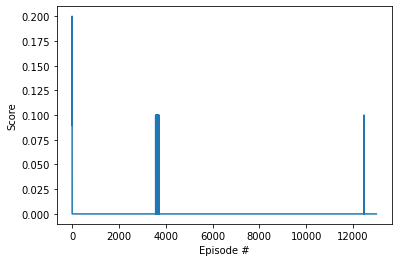

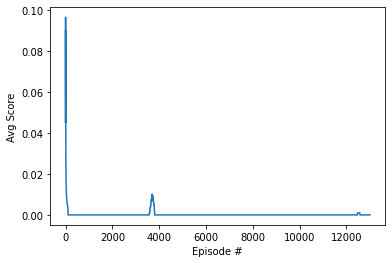


///// Beginning training set  M41.11  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999991
      Noise scale      = 0.041
      LR actor         = 0.0001768
      LR critic        = 0.0000421
      Learning every      86  time steps
      Learn iterations =  1
      Tau              = 0.00202
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer...................................................................................................

2000	Average score:   0.000,        mem:  10003/     1 ( 0.0%), avg 1939.1 eps/min;  0.1 hr rem   
4000	Average score:   0.000,        mem:  12818/     3 ( 0.0%), avg 1118.2 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15623/     3 ( 0.0%), avg 1120.2 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:  18517/     3 ( 0.0%

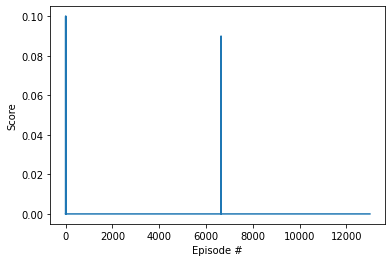

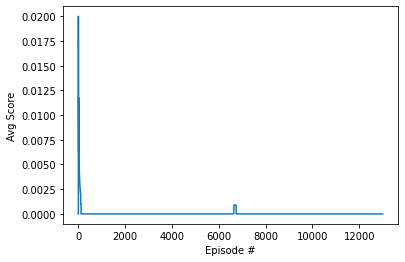


///// Beginning training set  M41.12  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999989
      Noise scale      = 0.050
      LR actor         = 0.0000762
      LR critic        = 0.0001044
      Learning every      78  time steps
      Learn iterations =  1
      Tau              = 0.00180
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer...................................................................................................

2000	Average score:   0.000,        mem:  10001/     0 ( 0.0%), avg 4323.0 eps/min;  0.1 hr rem   
4000	Average score:   0.000,        mem:  12821/     5 ( 0.0%), avg 1088.0 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15628/     5 ( 0.0%), avg 1086.6 eps/min;  0.2 hr rem   
7386	Running avg/max: 0.000/0.000,  mem:  17604/     5 ( 0.0%

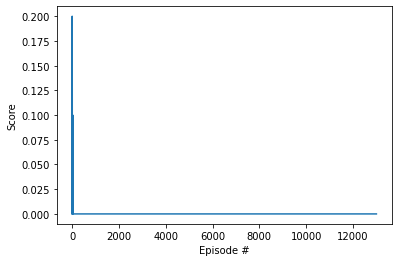

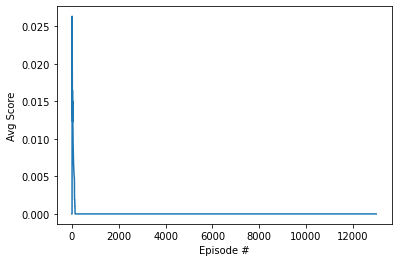


///// Beginning training set  M41.13  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999959
      Noise scale      = 0.041
      LR actor         = 0.0001179
      LR critic        = 0.0000810
      Learning every      99  time steps
      Learn iterations =  1
      Tau              = 0.00260
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer...................................................................................................

2000	Average score:   0.000,        mem:  10003/     0 ( 0.0%), avg 1341.8 eps/min;  0.2 hr rem   
3364	Running avg/max: 0.000/0.000,  mem:  11925/     5 ( 0.0%), avg 1158.3 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  12826/     5 ( 0.0%), avg 1157.0 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15621/     5 

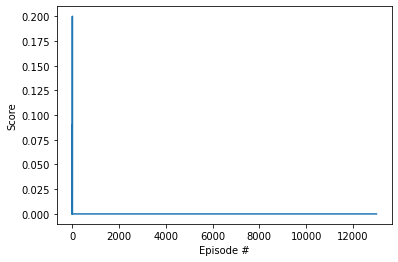

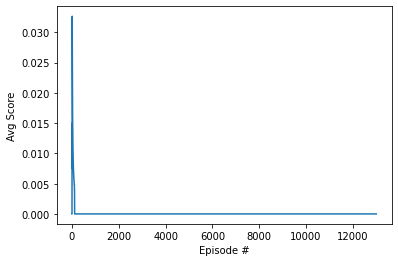


///// Beginning training set  M41.14  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999982
      Noise scale      = 0.041
      LR actor         = 0.0000392
      LR critic        = 0.0001277
      Learning every      92  time steps
      Learn iterations =  1
      Tau              = 0.00245
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer.................................................................................................

2000	Average score:   0.000,        mem:  10003/     0 ( 0.0%), avg 1951.1 eps/min;  0.1 hr rem   
4000	Average score:   0.008,        mem:  13097/    37 ( 0.3%), avg 1048.4 eps/min;  0.2 hr rem   
4923	Running avg/max: 0.000/0.000,  mem:  14406/    39 ( 0.3%), avg 1075.8 eps/min   
* noise mult = 0.2
6000	Average score:   0.000,        mem:  15913/    39 ( 

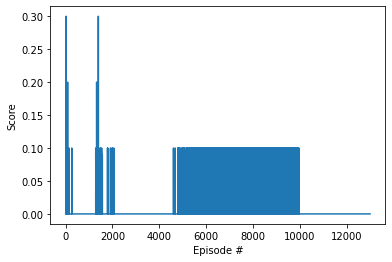

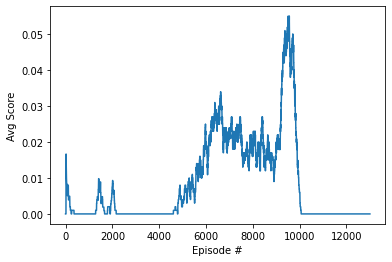


///// Beginning training set  M41.15  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999995
      Noise scale      = 0.050
      LR actor         = 0.0001327
      LR critic        = 0.0001091
      Learning every      78  time steps
      Learn iterations =  1
      Tau              = 0.00171
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer..................................................................................................

2000	Average score:   0.000,        mem:  10003/     1 ( 0.0%), avg 1883.4 eps/min;  0.1 hr rem   
4000	Average score:   0.001,        mem:  12822/     2 ( 0.0%), avg 1092.5 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15693/    29 ( 0.2%), avg 1088.0 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:  18738/   106 ( 0.6%)

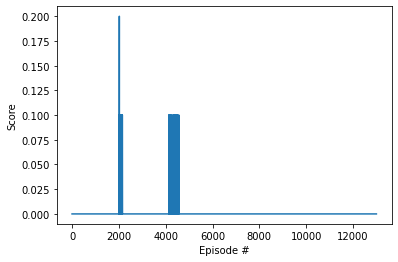

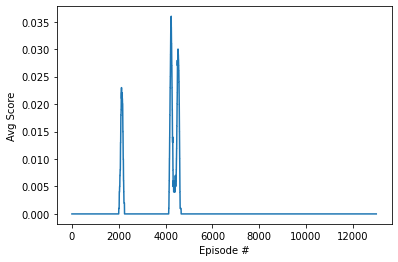


///// Beginning training set  M41.16  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999963
      Noise scale      = 0.044
      LR actor         = 0.0000725
      LR critic        = 0.0000348
      Learning every      87  time steps
      Learn iterations =  1
      Tau              = 0.00209
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer..................................................................................................

2000	Average score:   0.100,        mem:  10005/     1 ( 0.0%), avg 1351.5 eps/min;  0.2 hr rem   
3521	Running avg/max: 0.000/0.000,  mem:  12134/     3 ( 0.0%), avg 1115.0 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  12812/     3 ( 0.0%), avg 1115.1 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15590/     3 (

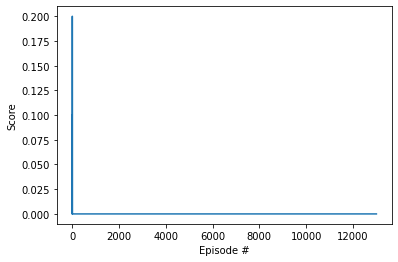

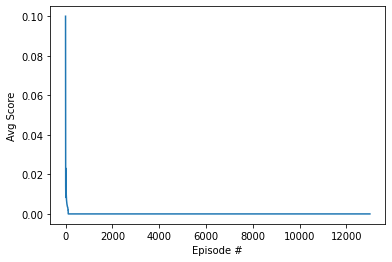


///// Beginning training set  M41.17  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999983
      Noise scale      = 0.041
      LR actor         = 0.0001386
      LR critic        = 0.0001739
      Learning every      97  time steps
      Learn iterations =  1
      Tau              = 0.00170
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer.................................................................................................

2000	Average score:   0.000,        mem:  10001/     0 ( 0.0%), avg 1702.4 eps/min;  0.1 hr rem   
4000	Average score:   0.000,        mem:  12788/     2 ( 0.0%), avg 1136.7 eps/min;  0.2 hr rem   
5314	Running avg/max: 0.000/0.000,  mem:  14627/     2 ( 0.0%), avg 1143.9 eps/min   
* noise mult = 0.2
6000	Average score:   0.000,        mem:  15613/     2 ( 

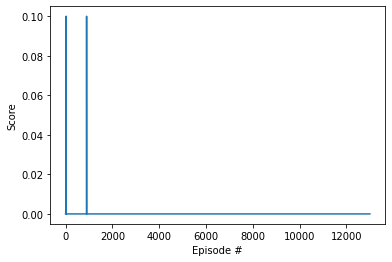

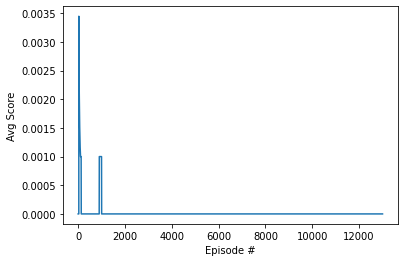


///// Beginning training set  M41.18  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999994
      Noise scale      = 0.048
      LR actor         = 0.0001982
      LR critic        = 0.0000478
      Learning every      83  time steps
      Learn iterations =  1
      Tau              = 0.00201
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer..................................................................................................

2000	Average score:   0.000,        mem:  10002/     1 ( 0.0%), avg 2074.4 eps/min;  0.1 hr rem   
4000	Average score:   0.000,        mem:  12806/     1 ( 0.0%), avg 1113.7 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15580/     1 ( 0.0%), avg 1112.6 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:  18435/     1 ( 0.0%)

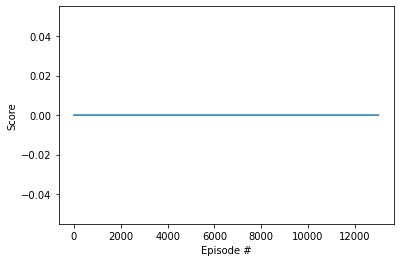

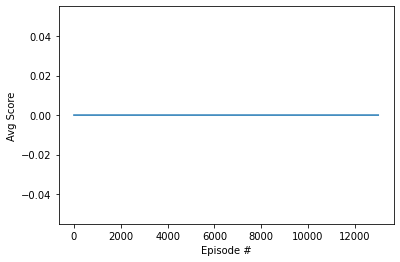


///// Beginning training set  M41.19  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999950
      Noise scale      = 0.050
      LR actor         = 0.0001297
      LR critic        = 0.0000272
      Learning every      98  time steps
      Learn iterations =  1
      Tau              = 0.00217
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer.................................................................................................

2000	Average score:   0.000,        mem:  10002/     0 ( 0.0%), avg 11638.4 eps/min;  0.0 hr rem   
3129	Running avg/max: 0.000/0.000,  mem:  11594/     3 ( 0.0%), avg 1005.4 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  12796/     3 ( 0.0%), avg 1057.4 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15627/     3 (

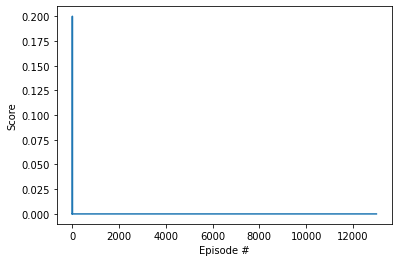

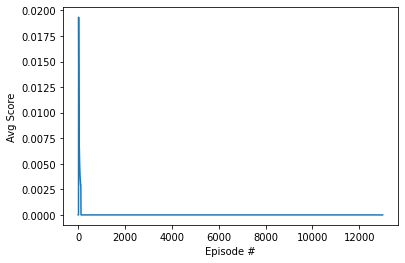


///// Beginning training set  M41.20  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999953
      Noise scale      = 0.046
      LR actor         = 0.0001461
      LR critic        = 0.0000453
      Learning every      95  time steps
      Learn iterations =  1
      Tau              = 0.00167
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer...................................................................................................

2000	Average score:   0.000,        mem:  10004/     1 ( 0.0%), avg 1662.1 eps/min;  0.2 hr rem   
3203	Running avg/max: 0.000/0.000,  mem:  11687/     1 ( 0.0%), avg 1121.5 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  12801/     1 ( 0.0%), avg 1129.8 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15603/     1 

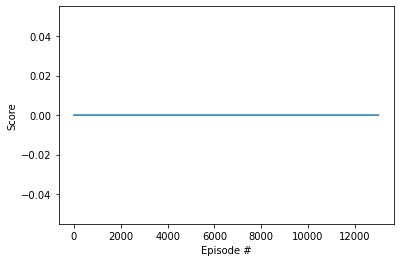

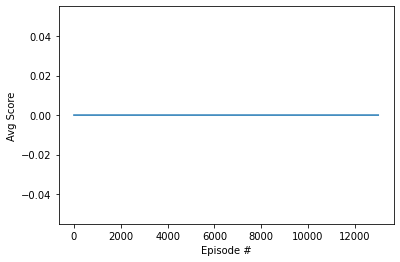


///// Beginning training set  M41.21  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999959
      Noise scale      = 0.045
      LR actor         = 0.0000434
      LR critic        = 0.0000792
      Learning every      78  time steps
      Learn iterations =  1
      Tau              = 0.00206
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer.................................................................................................

2000	Average score:   0.000,        mem:  10001/     0 ( 0.0%), avg 2282.0 eps/min;  0.1 hr rem   
3316	Running avg/max: 0.002/0.200,  mem:  11923/    15 ( 0.1%), avg 1059.3 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  12858/    15 ( 0.1%), avg 1074.9 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15695/    15 ( 

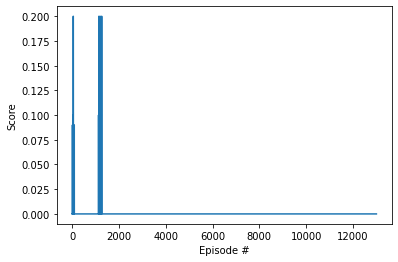

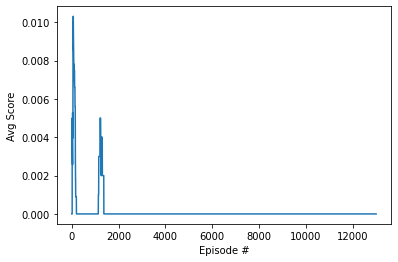


///// Beginning training set  M41.22  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999993
      Noise scale      = 0.045
      LR actor         = 0.0001645
      LR critic        = 0.0000645
      Learning every      77  time steps
      Learn iterations =  1
      Tau              = 0.00218
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer..................................................................................................

2000	Average score:   0.000,        mem:  10001/     0 ( 0.0%), avg 2973.6 eps/min;  0.1 hr rem   
4000	Average score:   0.005,        mem:  12822/     5 ( 0.0%), avg 1078.5 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15605/    12 ( 0.1%), avg 1079.6 eps/min;  0.2 hr rem   
8000	Average score:   0.000,        mem:  18488/    12 ( 0.1%)

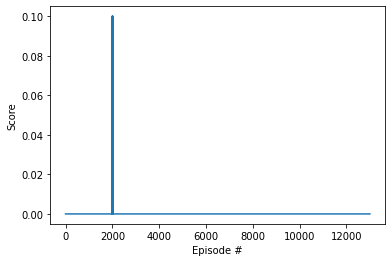

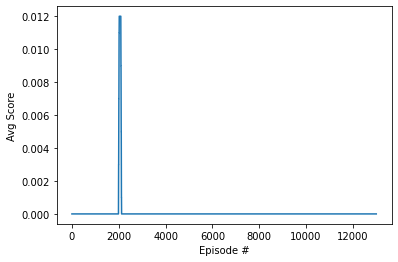


///// Beginning training set  M41.23  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999987
      Noise scale      = 0.042
      LR actor         = 0.0001600
      LR critic        = 0.0000560
      Learning every      95  time steps
      Learn iterations =  1
      Tau              = 0.00258
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer..................................................................................................

2000	Average score:   0.000,        mem:  10001/     0 ( 0.0%), avg 10465.9 eps/min;  0.0 hr rem   
4000	Average score:   0.000,        mem:  12785/     0 ( 0.0%), avg 1129.4 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15576/     0 ( 0.0%), avg 1136.9 eps/min;  0.2 hr rem   
6473	Running avg/max: 0.000/0.000,  mem:  16240/     0 ( 0.0%

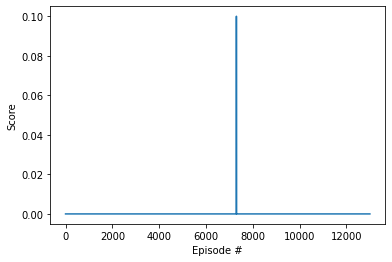

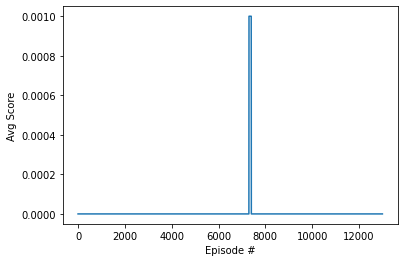


///// Beginning training set  M41.24  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999978
      Noise scale      = 0.050
      LR actor         = 0.0001229
      LR critic        = 0.0001602
      Learning every      81  time steps
      Learn iterations =  1
      Tau              = 0.00246
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer................................................................................................

2000	Average score:   0.000,        mem:  10001/     1 ( 0.0%), avg 1648.0 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:  12788/     4 ( 0.0%), avg 1099.3 eps/min;  0.2 hr rem   
4554	Running avg/max: 0.000/0.000,  mem:  13576/     4 ( 0.0%), avg 1091.2 eps/min   
* noise mult = 0.2
6000	Average score:   0.000,        mem:  15615/     5 ( 0

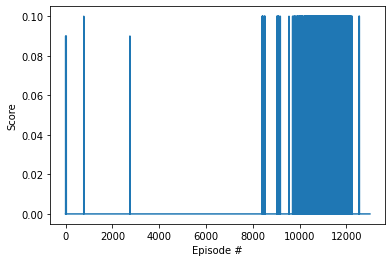

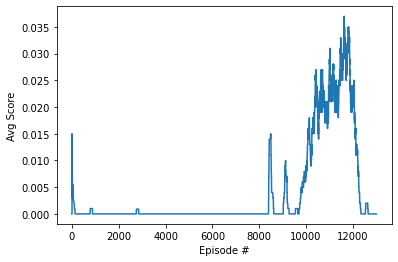


///// Beginning training set  M41.25  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999968
      Noise scale      = 0.048
      LR actor         = 0.0001898
      LR critic        = 0.0001695
      Learning every      83  time steps
      Learn iterations =  1
      Tau              = 0.00225
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer..................................................................................................

2000	Average score:   0.000,        mem:  10002/     0 ( 0.0%), avg 1334.0 eps/min;  0.2 hr rem   
3745	Running avg/max: 0.000/0.000,  mem:  12453/     2 ( 0.0%), avg 1108.3 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  12800/     2 ( 0.0%), avg 1113.0 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:  15590/     2 (

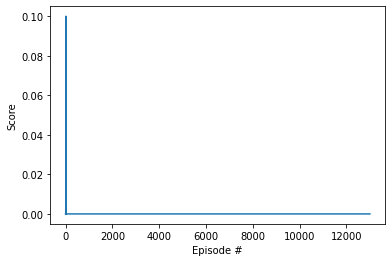

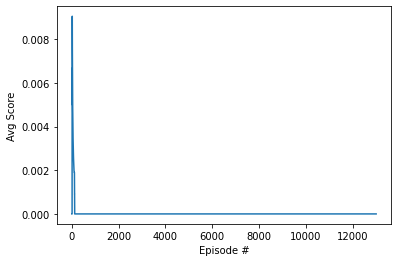


///// Beginning training set  M41.26  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999974
      Noise scale      = 0.041
      LR actor         = 0.0001452
      LR critic        = 0.0001575
      Learning every      81  time steps
      Learn iterations =  1
      Tau              = 0.00200
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer.................................................................................................

2000	Average score:   0.000,        mem:  10002/     0 ( 0.0%), avg 8735.8 eps/min;  0.0 hr rem   
4000	Average score:   0.000,        mem:  12806/     1 ( 0.0%), avg 1062.6 eps/min;  0.2 hr rem   
4188	Running avg/max: 0.000/0.000,  mem:  13064/     1 ( 0.0%), avg 1054.8 eps/min   
* noise mult = 0.2
6000	Average score:   0.000,        mem:  15610/     1 ( 

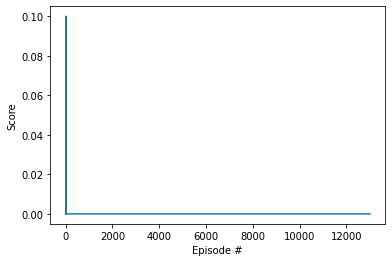

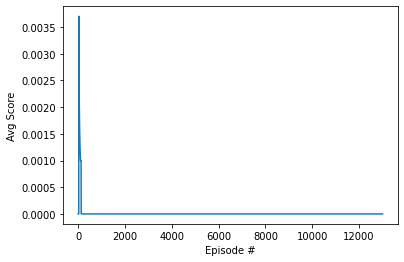


///// Beginning training set  M41.27  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999970
      Noise scale      = 0.042
      LR actor         = 0.0001649
      LR critic        = 0.0001615
      Learning every      75  time steps
      Learn iterations =  1
      Tau              = 0.00271
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer...................................................................................................

2000	Average score:   0.100,        mem:  10003/     1 ( 0.0%), avg 1342.6 eps/min;  0.2 hr rem   
3905	Running avg/max: 0.000/0.000,  mem:  12674/     5 ( 0.0%), avg 1140.6 eps/min   
* noise mult = 0.2
4000	Average score:   0.000,        mem:  12800/     5 ( 0.0%), avg 1147.0 eps/min;  0.2 hr rem   
6000	Average score:   0.015,        mem:  15722/    50 

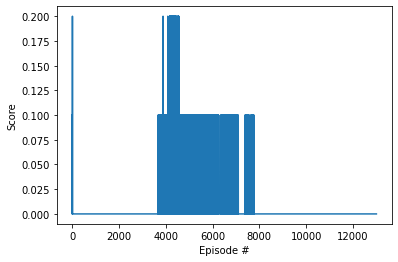

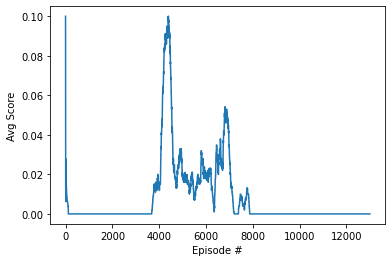


///// Beginning training set  M41.28  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999986
      Noise scale      = 0.048
      LR actor         = 0.0000538
      LR critic        = 0.0001512
      Learning every      83  time steps
      Learn iterations =  1
      Tau              = 0.00220
      Seed             =  44939
///// Beginning training from checkpoint for M37.29, episode 2000
Checkpoint loaded for M37.29, episode 2000
Priming the replay buffer.............................................................

In [ ]:
# This cell will explore several combinations of hyperparams by training all of them
# Use a random search for the hyperparams

TIME_STEPS         = 600
SAVE_ANALYSIS      = False
MODEL_DISPLAY_STEP = 0 #200k is approx 10k episodes at bad_step_prob = 0.01

if EXPLORE:
    
    # fixed for the session:
    RUN_PREFIX        = "M41"
    EPISODES          = 15001
    NUM_RUNS          = 30
    BAD_STEP_PROB     = 0.1
    BUFFER_PRIME_SIZE = 10000
    WEIGHT_DECAY      = 0.0 #was 1.0e-5
    GAMMA             = 0.99
    LR_ANNEAL_FREQ    = 1000 #episodes
    LR_ANNEAL_MULT    = 0.8
    SEED              = 44939 #(0, 111, 468, 5555, 23100, 44939)
    
    # session variables:
    vars = [
            ["continuous-float", 0.15,     0.23],     #BAD_STEP_PROB
            ["continuous-float", 0.999950, 0.999999], #NOISE_DECAY
            ["continuous-float", 0.040,    0.050],    #NOISE_SCALE
            ["continuous-float", 0.0000100, 0.0002000], #LR_ACTOR  (was 0.000010, 0.000080)
            ["continuous-float", 0.0000100, 0.0002000], #LR_CRITIC (was 0.000001, 0.000020)
            ["continuous-int",   75,       101],      #LEARN_EVERY
            ["continuous-int",   1,        2],        #LEARN_ITER
            ["continuous-float", 0.00160,  0.00280],  #TAU
            ["discrete",         256]                 #BATCH
           ]
    rs = RandomSampler(vars)
    
    print("Ready to train {} over {} training sets for {} episodes each, with fixed params:"
          .format(RUN_PREFIX, NUM_RUNS, EPISODES))
    print("    Max episodes   = ", EPISODES)
    print("    Weight decay   = ", WEIGHT_DECAY)
    print("    Gamma          = ", GAMMA)
    print("    LR anneal freq = ", LR_ANNEAL_FREQ)
    print("    LR anneal mult = ", LR_ANNEAL_MULT)
    print("    Buf prime size = ", BUFFER_PRIME_SIZE)
            
    for set_id in range(NUM_RUNS):
        
        # sample the variables
        v = rs.sample()
        #BAD_STEP_PROB = v[0]
        NOISE_DECAY   = v[1]
        NOISE_SCALE   = v[2]
        LR_ACTOR      = v[3]
        LR_CRITIC     = v[4]
        LEARN_EVERY   = v[5]
        LEARN_ITER    = v[6]
        TAU           = v[7]
        BATCH         = v[8]

        # set the replay buffer size to that it fills after ~5000 bad episodes
        # (at ~14 experiences/episode), based on the bad step retention rate
        #buffer_size = int(60000 - 50000*(1.0 - BAD_STEP_PROB))
        buffer_size = 100000

        RUN_NAME = "{}.{:02d}".format(RUN_PREFIX, set_id)
        print("\n///// Beginning training set ", RUN_NAME, " with:")
        print("      Batch size       = {:d}".format(BATCH))
        print("      Buffer size      = {:d}".format(buffer_size))
        print("      Bad step prob    = {:.4f}".format(BAD_STEP_PROB))
        print("      Noise decay      = {:.6f}".format(NOISE_DECAY))
        print("      Noise scale      = {:.3f}".format(NOISE_SCALE))
        print("      LR actor         = {:.7f}".format(LR_ACTOR))
        print("      LR critic        = {:.7f}".format(LR_CRITIC))
        print("      Learning every     ", LEARN_EVERY, " time steps")
        print("      Learn iterations = ", LEARN_ITER)
        print("      Tau              = {:.5f}".format(TAU))
        print("      Seed             = ", SEED)

        ##### instantiate the agents and perform the training

        maddpg = Maddpg(state_size, action_size, 2, bad_step_prob=BAD_STEP_PROB,
                        random_seed=SEED, batch_size=BATCH, buffer_size=buffer_size,
                        noise_decay=NOISE_DECAY, buffer_prime_size=BUFFER_PRIME_SIZE,
                        learn_every=LEARN_EVERY, 
                        learn_iter=LEARN_ITER, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC,
                        lr_anneal_freq=LR_ANNEAL_FREQ, lr_anneal_mult=LR_ANNEAL_MULT,
                        weight_decay=WEIGHT_DECAY, gamma=GAMMA, noise_scale=NOISE_SCALE,
                        tau=TAU, model_display_step=MODEL_DISPLAY_STEP)
        
        if config_name != None:
            print("///// Beginning training from checkpoint for {}, episode {}" \
                  .format(tag, initial_episode))
            maddpg.restore_checkpoint(checkpoint_path, tag, initial_episode)

        scores, avgs = train(maddpg, env, run_name=RUN_NAME, starting_episode=initial_episode,
                             max_episodes=EPISODES, winning_score=0.5, max_time_steps=TIME_STEPS,
                             checkpoint_interval=2000)

        ##### plot the training reward history

        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(len(scores)), scores)
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.show()
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(len(avgs)), avgs)
        plt.ylabel('Avg Score')
        plt.xlabel('Episode #')
        plt.show()

        ##### store the action/noise data, if being used

        if SAVE_ANALYSIS:
            maddpg.save_anal_data(RUN_PREFIX)

                            
    print("\n\nDONE!")

# HEY JOHN - TODO!

- update main.py to match the above code {ALL CELLS}
- Test running from cmd line (may need a script?)
- Clean up the bottom part of this notebook

### Run two trained agents against each other (inference mode)

Note:  before running this cell, the Unity environment object will need to be defined (at top of notebook) with `no_graphics=False` so that the graphical game display will appear.

In [ ]:
if not EXPLORE:
    
    # load the pre-trained model
    model = Maddpg(state_size, action_size, 2)
    model.restore_checkpoint(checkpoint_path, tag, initial_episode)

    for i in range(10):                                        # play game for several episodes
        env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        num_steps = 0
        while True:
            actions = model.act(states, add_noise=False)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            num_steps += 1
            if np.any(dones):                                  # exit loop if episode finished
                break
        print('Episode {}: {:5.3f}, took {} steps'.format(i, np.max(scores), num_steps))


When finished, you can close the environment.

In [ ]:
env.close()